In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import umap.umap_ as umap

In [7]:
#data = pd.read_csv('topic_score.csv')
data = pd.read_csv('X_lsi_v2.csv')

In [9]:
book_name = pd.read_csv('clean_data.csv')
book_name = book_name.reset_index()

In [4]:
data = data.merge(book_name,how='left',left_on=['Unnamed: 0'],right_on=['index'])

In [5]:
data = data.iloc[:,1:10]

In [10]:
data.head(3)

,Unnamed: 0,0,1,2,3,4,5,Title
0,0,0.135449,0.017621,0.090751,-0.041925,0.004891,0.032231,The Lost World of British Communism
1,1,0.141632,0.046268,0.089763,0.003780,-0.023710,0.050708,Village of Secrets
2,2,0.151114,-0.008318,0.006732,-0.005415,0.015283,-0.016143,Banquet for the Damned


In [20]:
#data = pd.concat([data.iloc[:,0:6], data.iloc[:,8]], axis=1)  
genre = pd.read_csv('book_genre.csv')
new = genre.merge(data.iloc[:,1:],how='inner',left_on=['Title'],right_on=['Title'])

In [21]:
new.head(3)

,Title,fantasy,science,horror,thriller,mystery,detective,history,young,children,0,1,2,3,4,5
0,Ratha and Thistle-chaser,1,0,0,0,0,0,0,0,0,0.038743,-0.005888,-0.017897,0.012836,-0.000325,-0.012009
1,The Black Corsair,0,0,0,0,0,0,0,1,0,0.073605,0.011768,-0.032015,0.047602,0.006451,-0.001962
2,The Mystery of the Black Jungle,0,0,0,0,0,0,0,1,0,0.110825,-0.012271,-0.028064,0.024038,-0.013851,-0.026025


In [22]:
### 9个类
category_name = new.columns
types = []
types_index = []
for i in range(len(new)):
    for k in range(1,10):
        if new.iloc[i, k] == 1:
            types.append(category_name[k])
            types_index.append(k)
            break 
new['genre'] = types
new['genre_index'] = types_index

In [25]:
new.head(3)

,0,1,2,3,4,5,Title,genre,genre_index
0,0.038743,-0.005888,-0.017897,0.012836,-0.000325,-0.012009,Ratha and Thistle-chaser,fantasy,1
1,0.073605,0.011768,-0.032015,0.047602,0.006451,-0.001962,The Black Corsair,young,8
2,0.110825,-0.012271,-0.028064,0.024038,-0.013851,-0.026025,The Mystery of the Black Jungle,young,8


In [24]:
new = new.iloc[:,[10,11,12,13,14,15,0,16,17]]

In [34]:
new.to_csv('classification.csv', index=False)

### All 9 categories.

Text(0.5, 1.0, 'Umap Embedding For 9 Genres')

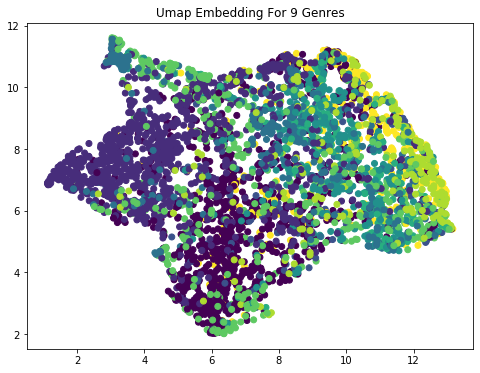

In [26]:
mapper = umap.UMAP(n_components=2).fit_transform(new.iloc[:,:6])
plt.figure(figsize=[8,6])
plt.scatter(mapper[:,0], mapper[:,1], c=list(new.genre_index))
plt.title('Umap Embedding For 9 Genres')

In [27]:
def plot(type1,type2,color,title):
    mapper = umap.UMAP(n_components=2).fit_transform(new.iloc[type1+type2,:6])
    plt.figure(figsize=[8,6])
    plt.scatter(mapper[:,0], mapper[:,1], c=color)
    plt.title(title)

## fantasy vs. science

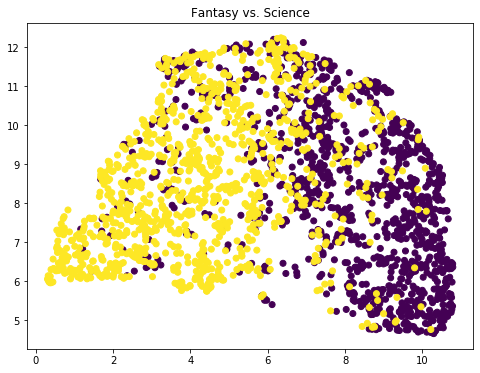

In [28]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==1]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==2]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color,'Fantasy vs. Science')

## Horror vs. Thriller

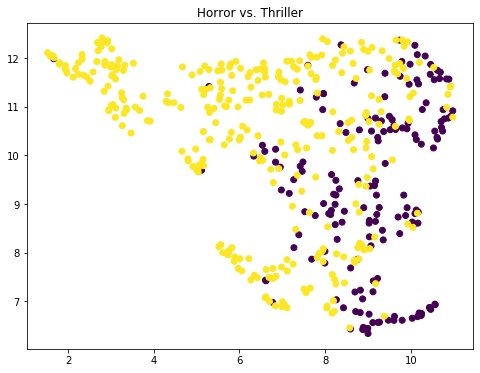

In [29]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==3]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==4]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Horror vs. Thriller')

## Fantasy vs. Mystery

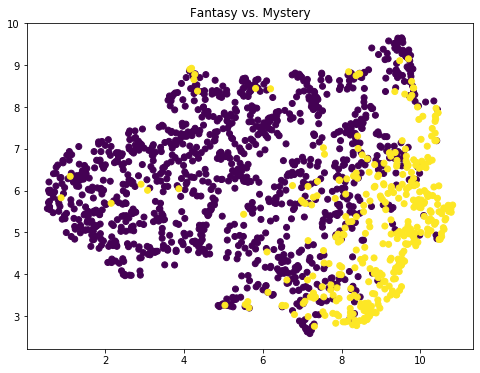

In [30]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==1]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==5]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Fantasy vs. Mystery')

## Mystery vs. Children

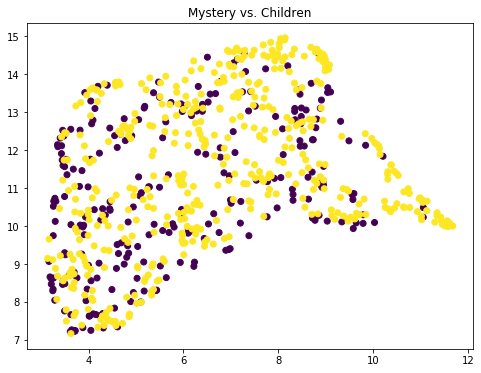

In [37]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==8]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==9]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Mystery vs. Children')

## Science vs. History

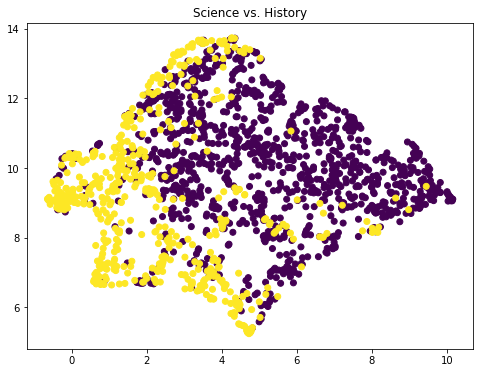

In [32]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==2]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==7]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Science vs. History')

## Detective vs. History

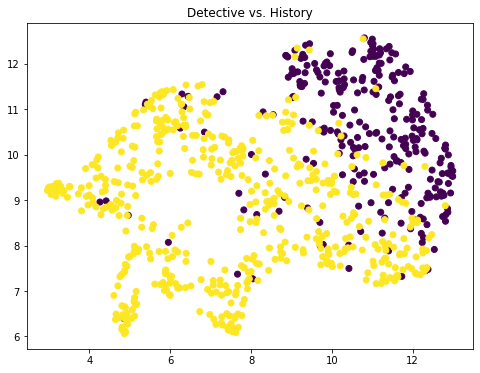

In [33]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==6]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==7]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Detective vs. History')

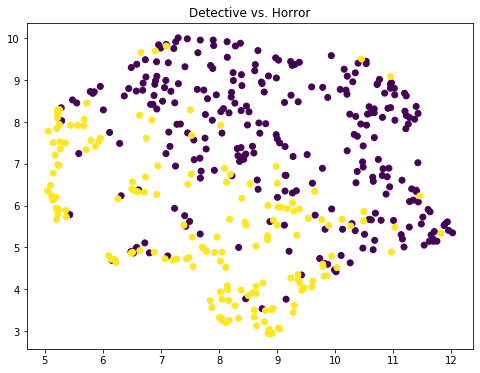

In [36]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==6]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==3]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Detective vs. Horror')